In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score
import torch

In [3]:
data_path= '/dev/shm/wht/datasets/things-eeg-small/Preprocessed_data_250Hz_whiten/sub-08/test.pt'
loaded_data = torch.load(data_path)
loaded_data['eeg']=torch.from_numpy(loaded_data['eeg'])

/tmp/ipykernel_3578198/3728993865.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(data_path)


In [5]:
ele = loaded_data['eeg'][0,:,0,:].cpu().detach().numpy()
print(ele.shape)
ele = ele.transpose(1, 0)
print(ele.shape)
ele = ele.reshape(-1,1)
print(ele.shape)
kernel = ConstantKernel(constant_value=1.0) * RBF(length_scale=1.0)

(80, 250)
(250, 80)
(20000, 1)


In [6]:
noise = 0.1
points = np.linspace(0, 1, 250).reshape(250,1)

x = np.tile(points, (80, 1))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=noise**2) # Create GaussianProcessRegressor object with kernel and noise variance
print(x.shape,ele.shape)
gpr.fit(x, ele) # Fit model to training data

(20000, 1) (20000, 1)


/home/wht/anaconda3/envs/brain/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.010000000000000002,
                         kernel=1**2 * RBF(length_scale=1))

In [7]:
y_test_predict = gpr.predict(points)
y_test_predict.shape

(250,)

In [11]:
points[:250].shape

(250, 1)

In [13]:
ele[:].shape

(20000, 1)

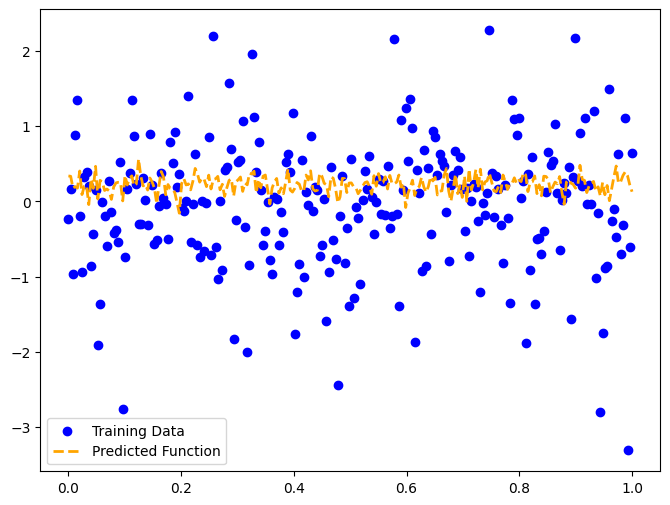

In [14]:
plt.figure(figsize=(8, 6))

index = 2
plt.scatter(points[:250].reshape(-1), ele[:250].reshape(-1), color='blue', label='Training Data')
# plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)
# plt.plot(X_test, X_test * np.sin(X_test), color='green', label='True Function', linewidth=2)
plt.plot(points[:250].reshape(-1), y_test_predict[:], color='orange', linestyle='--', label='Predicted Function', linewidth=2)
plt.legend()